In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend
backend.clear_session()


 LOAD DATASET

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape                               #y always single dimensional

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array for our classification having 1D array is good enough so will convert this 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Lets plot some images to see what they are

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

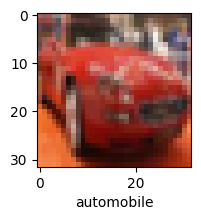

In [ ]:
plot_sample(x_train, y_train,5)

In [ ]:
# Normalize the images to number from 0 to 1. Image has 3 channel(RGB) and each value in the channel can range 0 to 255. hense normalize in
#0>1 range we need to divide by 255

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [ ]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [ ]:
ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 163s 103ms/step - loss: 1.8109 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.6241 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.5405 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 165s 105ms/step - loss: 1.4839 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4310 - accuracy: 0.4981


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report (y_test,y_pred_classes))

313/313 [==============================] - 11s 34ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.56      1000
           1       0.65      0.54      0.59      1000
           2       0.37      0.35      0.36      1000
           3       0.42      0.21      0.28      1000
           4       0.41      0.38      0.40      1000
           5       0.48      0.30      0.37      1000
           6       0.45      0.69      0.54      1000
           7       0.50      0.61      0.55      1000
           8       0.70      0.43      0.53      1000
           9       0.46      0.71      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [ ]:
#now let us build a CNN to train our images

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer="adam",
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train, epochs=7)

Epoch 1/7
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0115 - accuracy: 0.6446
Epoch 2/7
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9550 - accuracy: 0.6679
Epoch 3/7
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9059 - accuracy: 0.6834
Epoch 4/7
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8677 - accuracy: 0.6969
Epoch 5/7
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8350 - accuracy: 0.7063
Epoch 6/7
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7990 - accuracy: 0.7199
Epoch 7/7
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7674 - accuracy: 0.7315


In [ ]:
#with CNN at the end 5 epochs accurancy was at around 70.28% which is a significant improvement over ANN . CNN's are the best image classification
#and gives superb accurancy. Also computation is much less  compared to simple ANN as maxpooling reduce the image dimension while still
#preserving the features.

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9331 - accuracy: 0.6791


[0.933106541633606, 0.679099977016449]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[6.65186420e-02, 1.89106082e-04, 2.36661602e-02, 6.99254394e-01,
        1.15754839e-03, 1.85974002e-01, 1.85302123e-02, 1.67168124e-04,
        4.02885955e-03, 5.13963518e-04],
       [1.63144339e-02, 6.44619763e-01, 2.07290632e-05, 1.03662278e-05,
        1.24564428e-06, 1.85489500e-06, 6.40971939e-06, 1.55149542e-06,
        3.25161040e-01, 1.38626331e-02],
       [9.41686258e-02, 3.81252110e-01, 3.07109184e-03, 1.08534256e-02,
        3.92362988e-03, 1.56073901e-03, 2.95898691e-03, 3.76771041e-03,
        4.21206295e-01, 7.72373602e-02],
       [9.53060925e-01, 1.05966628e-02, 7.51265744e-03, 2.70920835e-04,
        2.00339151e-03, 5.81159366e-05, 5.61945140e-04, 6.70850859e-04,
        2.38324199e-02, 1.43206934e-03],
       [1.37770985e-05, 6.12250951e-05, 2.34656818e-02, 1.48911178e-02,
        5.26260912e-01, 1.56910252e-03, 4.33561563e-01, 1.35580731e-05,
        1.60897194e-04, 2.10234089e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 1, 8, 0, 4, 6, 1, 2, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

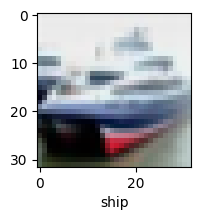

In [ ]:
plot_sample(x_test, y_test,1)

In [ ]:
classes[y_classes[8]]

'cat'

In [ ]:
classes[y_classes[3]]

'airplane'